In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import csv

br_types = ['mdamb231', 'mcf7']
cell_types = sorted(['hela', 'preo', 'h838', 'lclc', 'mdamb231',  'breastcancer', 'mcf7'])
SRC_PATH = '../data_paths.txt'
DEST_PATH = '/media/balint/Backup1/data/1d-class-datasets/interpolated-4th-run/'

In [32]:
with open(SRC_PATH, 'r') as fp:
    for file_path in fp.readlines():
        file_path = file_path.strip()
        tp = file_path.split('/')[-1].split('_')[0].lower()
        if tp in cell_types:
            print(file_path, tp, os.path.exists(file_path))
            res_max_path = os.path.join(DEST_PATH, f'{tp}_max_signals.csv')
            lines = pd.read_csv(file_path, header=None)
            time = np.round(np.array(lines.iloc[0, :]), 0).astype(int)
            signals = np.array(lines.iloc[1:, :])
            
            d = []
            for i in range(signals.shape[0]):
                if np.min(signals[i]) <= -100:
                    d.append(i)
            
            signals = np.delete(signals, d, axis=0)
            
            diff = np.diff(np.mean(signals, axis=0))
            err = np.argwhere(np.logical_or(diff > 5, diff < -5))
            err = err.reshape((-1,))
            err.sort()
            peaks = np.argwhere(np.diff(err) == 1)
            peaks = peaks.reshape((-1, ))
            err = np.unique(np.concatenate([err[peaks], err[peaks + 1]]))
            data_range = np.arange(signals.shape[1])
            org = data_range.copy()
            data_range = np.delete(data_range, err, axis=0)
            
            data = signals
        
            time_avg_max = np.round(np.mean(np.diff(time)), 0)
            
            new_data = np.zeros(data.shape)
            data = np.delete(data, err, axis=1)
            for i in range(new_data.shape[0]):
                new_data[i] = np.interp(org, data_range, data[i])
            data = new_data

            interpolate = False
            if time_avg_max == 12:
                interpolate = True
                new_time = np.round(np.linspace(0,max(time), int(max(time) / 3)),0).astype(int)
                new_time_red = np.interp(new_time, time, time)[:None:3]
                
            if interpolate:
                print(f'Interpolating {file_path}')
                new_data = np.zeros((data.shape[0], new_time_red.shape[0]))
                for i in range(data.shape[0]):
                    new_data[i] = np.interp(new_time_red, time, data[i])
                data = new_data
                
            for i in range(data.shape[0]):
                data[i] -= data[i, 0]

            pd.DataFrame(data).to_csv(res_max_path, mode='a', header=None, index=None)
            
            if tp in br_types:
                pd.DataFrame(data).to_csv(os.path.join(DEST_PATH, f'breastcancer_max_signals.csv'), mode='a', header=None, index=None)
            


/media/balint/Backup1/data/fibronectin/20210526_LCLC_fn/eval/LCLC_max_signals.csv lclc True
/media/balint/Backup1/data/fibronectin/20210526_MDAMB231_fn/eval/MDAMB231_max_signals.csv mdamb231 True
/media/balint/Backup1/data/fibronectin/20210526_MCF7_fn/eval/MCF7_max_signals.csv mcf7 True
/media/balint/Backup1/data/fibronectin/20210527_H838_fn/eval/H838_max_signals.csv h838 True
/media/balint/Backup1/data/fibronectin/20210607_H838_LCLC_fn/eval/LCLC_max_signals.csv lclc True
Interpolating /media/balint/Backup1/data/fibronectin/20210607_H838_LCLC_fn/eval/LCLC_max_signals.csv
/media/balint/Backup1/data/fibronectin/20210607_H838_LCLC_fn/eval/H838_max_signals.csv h838 True
Interpolating /media/balint/Backup1/data/fibronectin/20210607_H838_LCLC_fn/eval/H838_max_signals.csv
/media/balint/Backup1/data/fibronectin/20210608_MDAMB231_MCF7_fn/eval/MDAMB231_max_signals.csv mdamb231 True
/media/balint/Backup1/data/fibronectin/20210608_MDAMB231_MCF7_fn/eval/MCF7_max_signals.csv mcf7 True
/media/balint/

breastcancer (2052, 1080)
h838 (169, 1080)
hela (932, 1080)
lclc (387, 1080)
mcf7 (387, 1080)
mdamb231 (1665, 1080)
preo (835, 1080)


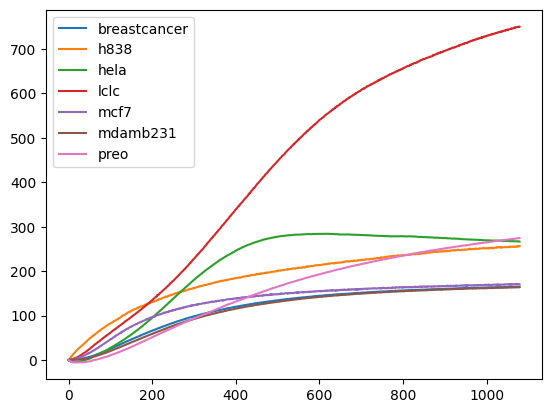

In [13]:
ln = 120 * 9
plt.figure()
for tp in cell_types:
    res_max_path = os.path.join(DEST_PATH, f'{tp}_max_signals.csv')
    if os.path.exists(res_max_path):
        data = []
        fp = open(res_max_path, 'r')
        reader = csv.reader(fp)
        for line in reader:
            if len(line) >= ln:
                line = list(map(float, line))[:ln]
                data.append(line)
        data = np.asarray(data)
        print(tp, data.shape)
        plt.plot(np.mean(data, axis=0), label=tp)
plt.legend()
plt.show()


In [5]:
datasets = ["hela-mdamb231-mcf7-lclc", "mdamb231-mcf7", "mdamb231-mcf7-lclc", "preo-hela-lclc", "preo-hela-mdamb231-mcf7-lclc", "preo-hela", "hela-breastcancer-lclc", "breastcancer-lclc", "preo-hela-breastcancer-lclc"]
times = ['0.5hrs', '1hrs', '1.5hrs', '2hrs']

# for i, t in enumerate(times):
#     for ds in datasets:
#         if not os.path.exists(os.path.join(DEST_PATH, str(t), ds)):
#             os.makedirs(os.path.join(DEST_PATH, str(t), ds))
#         typs = sorted(ds.split('-'))
#         labels = list(range(len(typs)))
#         data = []
#         for tp in typs:
#             res_max_path = os.path.join(DEST_PATH, f'{tp}_max_signals.csv')
#             if os.path.exists(res_max_path):
#                 fp = open(res_max_path, 'r')
#                 reader = csv.reader(fp)
#                 for line in reader:
#                     if len(line) >= ln:
#                         line = list(map(float, line))[:ln]
#                         data.append(line)
#         data = np.asarray(data)
        
#         pd.DataFrame(list(zip(typs, labels)), columns=['type', 'tag']).to_csv(os.path.join(DEST_PATH, str(t), ds, 'dictionary.csv'), index=None)

In [39]:
def repeat_list_to_length(lst, desired_length):
    repeated_list = []
    while len(repeated_list) < desired_length:
        repeated_list.extend(lst)
    return repeated_list[:desired_length]

def split_dataset(datasets, types, val_split=.2, upsample=True):
    X_train, y_train, X_test, y_test = [], [], [], []
    print(list(map(len, datasets)))
    max_len = int(max(list(map(len, datasets))) * (1 - val_split))
    
    for t, s in zip(types, datasets):
        shuffled_indices = np.random.permutation(len(s))
        train_indices, test_indices = train_test_split(shuffled_indices, test_size=val_split, random_state=42)
        train = list(np.array(s)[train_indices])
        train_extended = repeat_list_to_length(train, max_len) if upsample else train
        X_train.extend(train_extended)
        y_train.extend([t] * len(train_extended))
        X_test.extend(list(np.array(s)[test_indices]))
        y_test.extend([t] * len(test_indices))

    train = list(zip(X_train, y_train))
    random.shuffle(train)
    X_train, y_train = zip(*train)
    return X_train, y_train, X_test, y_test
        
def create_dataset(path, cell_types, time, val_split=.2, upsample=True):
    tags = sorted(cell_types)
    labels = list(range(len(tags)))
    datasets = []
    for tp in tags:
        data = []
        res_max_path = os.path.join(path, f'{tp}_max_signals.csv')
        if os.path.exists(res_max_path):
            fp = open(res_max_path, 'r')
            reader = csv.reader(fp)
            for line in reader:
                if len(line) >= time:
                    line = list(map(float, line))[:time]
                    data.append(line)
        if len(data) == 0 or not os.path.exists(res_max_path):
            raise ValueError(f'Data does not exist for cell type {tp}')
        datasets.append(data)
    
    X_train, y_train, X_test, y_test = split_dataset(datasets, labels, val_split, upsample)
    return *list(map(np.array, [X_train, y_train, X_test, y_test])), (tags, labels)
    

In [41]:
X_train, y_train, X_test, y_test, tag_conv =  create_dataset(DEST_PATH, datasets[0].split('-'), 120 * 9)

[932, 387, 387, 1665]


In [37]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1, 2, 3]), array([1332, 1332, 1332, 1332])),
 (array([0, 1, 2, 3]), array([187,  78,  78, 333])))